C:\Users\srlit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\srlit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\srlit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\srlit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

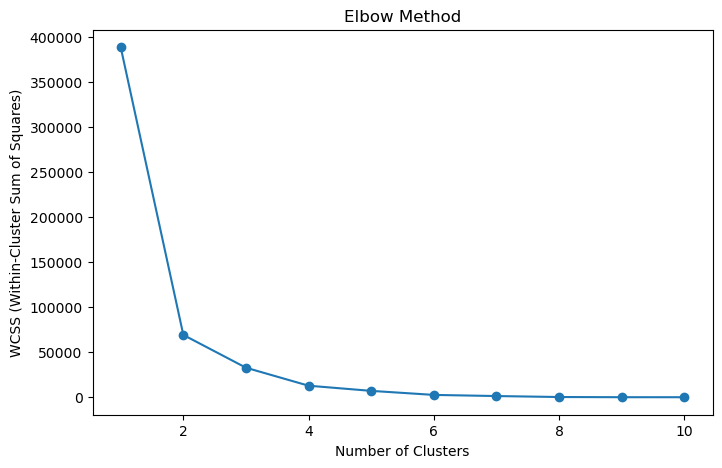

C:\Users\srlit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


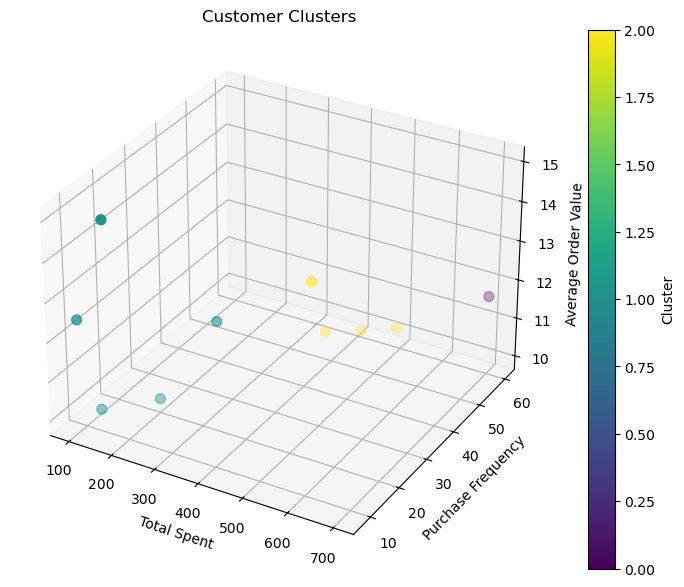

Clustered Data:
   customer_id  total_spent  purchase_frequency  average_order_value  cluster
0            1          200                  20                10.00        1
1            2          450                  40                11.25        2
2            3          150                  10                15.00        1
3            4          300                  25                12.00        1
4            5          500                  45                11.11        2
5            6          700                  60                11.67        0
6            7          100                   8                12.50        1
7            8          450                  35                12.86        2
8            9          120                  12                10.00        1
9           10          550                  50                11.00        2

Cluster Centroids:
   total_spent  purchase_frequency  average_order_value
0        700.0                60.0               1

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data (replace this with your actual dataset)
data = {
    'customer_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'total_spent': [200, 450, 150, 300, 500, 700, 100, 450, 120, 550],
    'purchase_frequency': [20, 40, 10, 25, 45, 60, 8, 35, 12, 50],
    'average_order_value': [10, 11.25, 15, 12, 11.11, 11.67, 12.5, 12.86, 10, 11]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Feature matrix (X)
X = df[['total_spent', 'purchase_frequency', 'average_order_value']]

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Applying K-means to the dataset
optimal_clusters = 3  # Set based on the elbow graph
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster information to the DataFrame
df['cluster'] = y_kmeans

# 3D Visualization of clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X['total_spent'], X['purchase_frequency'], X['average_order_value'], 
    c=y_kmeans, cmap='viridis', s=50
)
ax.set_title("Customer Clusters")
ax.set_xlabel('Total Spent')
ax.set_ylabel('Purchase Frequency')
ax.set_zlabel('Average Order Value')
plt.colorbar(scatter, ax=ax, label="Cluster")
plt.show()

# Print the DataFrame with clusters
print("Clustered Data:")
print(df)

# Centroids of the clusters
print("\nCluster Centroids:")
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['total_spent', 'purchase_frequency', 'average_order_value'])
print(centroids)

# Save the clustered data for future use
df.to_csv('clustered_customers.csv', index=False)
